In [117]:
import pandas as pd
import numpy as np

In [118]:
data = pd.read_csv('data/iris.csv')
data = data.drop(['petal.width', 'petal.length', 'sepal.width'], axis=1)
data.sort_values(by='sepal.length', inplace=True)
data.reset_index(drop=True, inplace=True)
# n_instances = data.shape[0]
data['changed'] = (data['variety'] != data['variety'].shift())
# change the first row to True
data.loc[0, 'changed'] = False

In [119]:
data.head(30) # Data prepared

,sepal.length,variety,changed
0,4.3,Setosa,False
1,4.4,Setosa,False
2,4.4,Setosa,False
3,4.4,Setosa,False
4,4.5,Setosa,False
5,4.6,Setosa,False
6,4.6,Setosa,False
7,4.6,Setosa,False
8,4.6,Setosa,False
9,4.7,Setosa,False


In [130]:
def entropy(data: pd.Series):
    n_instances = data.shape[0]
    counts = data.value_counts()
    
    probs = counts / n_instances
    return -np.sum(probs * np.log2(probs))

def calc_entropy_left_right(data: pd.DataFrame, attribute):
    n_instances = data.shape[0]
    where_data_changed = data[data['changed'] == True].index.values # indicates where the label switches
    
    selected_values = data.iloc[where_data_changed][attribute].reset_index(drop=True)
    previous_values = data.iloc[where_data_changed -1][attribute].reset_index(drop=True)
    
    averages = np.average([selected_values, previous_values], axis=0)
    
    best_info_gain = 0
    best_split = None
    for i in range(where_data_changed.shape[0]):
        data_left = data.iloc[:where_data_changed[i]]
        data_right = data.iloc[where_data_changed[i]:]
        
        ent_left = (data_left.shape[0] / n_instances) * entropy(data_left['class'])
        ent_right = (data_right.shape[0] / n_instances) * entropy(data_right['class'])
        
        print(ent_left, ent_right)
        information_gain = entropy(data['changed']) - (ent_left + ent_right)
        if information_gain > best_info_gain:
            best_info_gain = information_gain
            best_split = averages[i]
        
    return best_split, best_info_gain


age = [5,7,10,13,17,21,38,42,53,55,61,84,88]
clases = [1,1,0,1,1,0,0,1,1,1,1,0,0]
data = pd.DataFrame({'age': age, 'class': clases})
n_instances = data.shape[0]
data['changed'] = (data['class'] != data['class'].shift())
# # change the first row to True
data.loc[0, 'changed'] = False
print(calc_entropy_left_right(data, 'age'))
# print(calc_entropy_left_right(data, 'age'))


-0.0 0.8411024866343477
0.21191442324334375 0.7468850726574374
0.27766465187975475 0.6153846153846154
0.530507457864597 0.4238288464866875
0.7152969463728308 -0.0
(72.5, 0.24593965835004505)


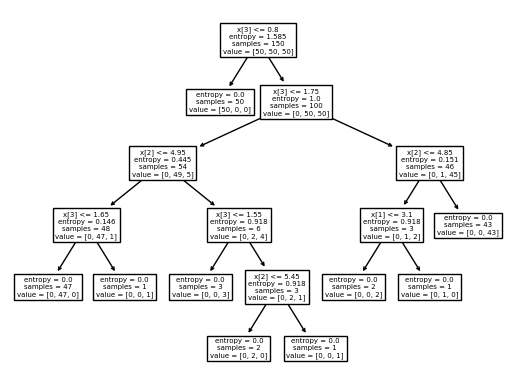

In [8]:
# import sklearn and perform the DecisionTreeClassifier on Iris Dataset
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import tree
from matplotlib import pyplot as plt

clf = DecisionTreeClassifier(random_state=0, criterion='entropy')
iris = load_iris()
clf = clf.fit(iris.data, iris.target)
tree.plot_tree(clf)
plt.savefig('data/iris_tree.svg', dpi=300)
